In [1]:
## importing relevant libraries....
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
## Importing the dataset....
df = pd.read_csv("Absenteeism_data.csv")
df.head()

,ID,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,22,27,13-04-2018,179,26,30,246.288,19,3,0,0,2
1,34,10,11-04-2018,118,10,37,246.288,28,1,0,0,2
2,36,23,10-04-2018,118,13,50,246.288,31,1,1,0,3
3,17,16,10-04-2018,179,22,40,246.288,22,2,2,0,2
4,10,23,10-04-2018,361,52,28,246.288,27,1,1,4,2


In [3]:
## Creating the "Targets" column for the data set,.......
df['target'] = np.where(df['Absenteeism Time in Hours'] > df['Absenteeism Time in Hours'].median() , 1 , 0)

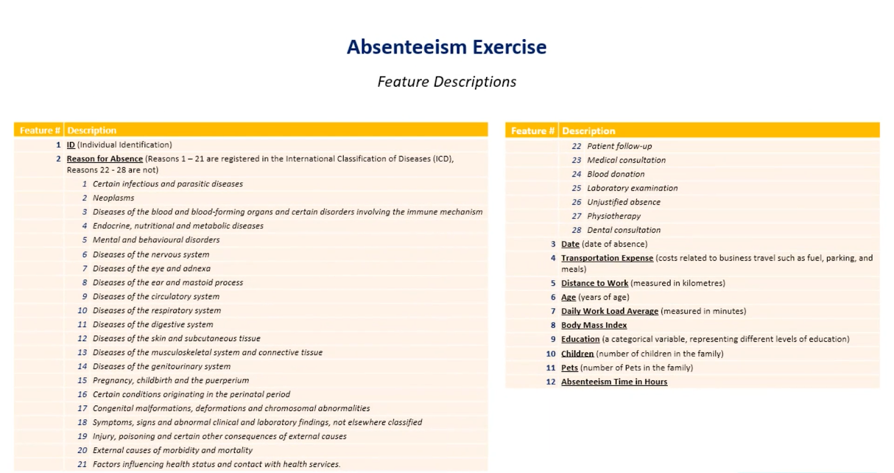

## EDA :

#### Reason for Absence	:

<AxesSubplot:xlabel='Reason for Absence', ylabel='count'>

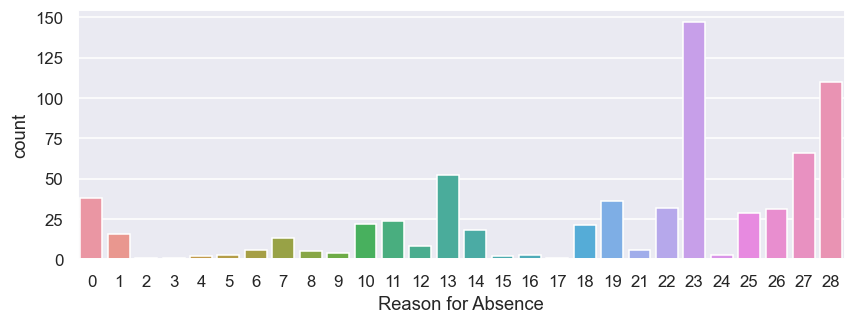

In [4]:
## Creating countplot for "Reason for Absence"....
plt.figure(dpi = 110 , figsize = (9,3))
sns.countplot(x = 'Reason for Absence' , data = df)

- **The top 3 reasons given by people are:**
 1. Medical Consultation
 2. Dental Consultation
 3. Physiotherapy
 
    - We can see these are medical issues given by people for absenteeism.

#### Transportation Expense :

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


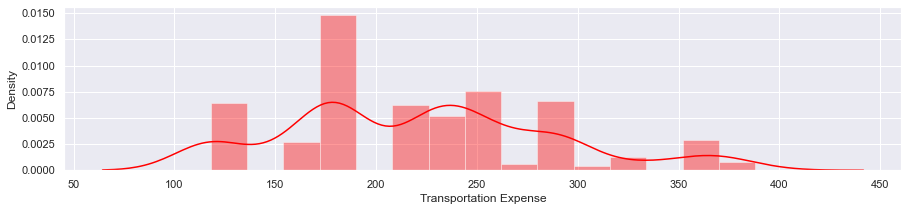

In [5]:
ax = plt.subplots(1,1,figsize=(15,3))
ax = sns.distplot(df['Transportation Expense'] , color = 'red')

<AxesSubplot:xlabel='Transportation Expense'>

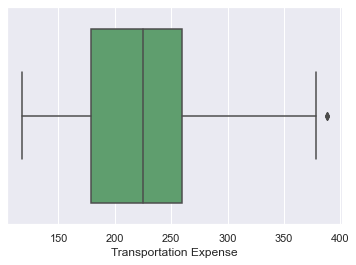

In [6]:
sns.boxplot(x = df['Transportation Expense'] , color = 'g')

In [7]:
print("The mean of 'Transportation Expense' is :" , df['Transportation Expense'].mean())

The mean of 'Transportation Expense' is : 222.34714285714287


#### Some take-aways:
- 25% of people spend upto 175 for "Transportation Expense".
- 50% of people spend upto 225 for "Transportation Expense".
- 75% of people spend upto 260 for "Transportation Expense".
        - We have very few outliers in this category with value more than 380.

#### Distance to Work :

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


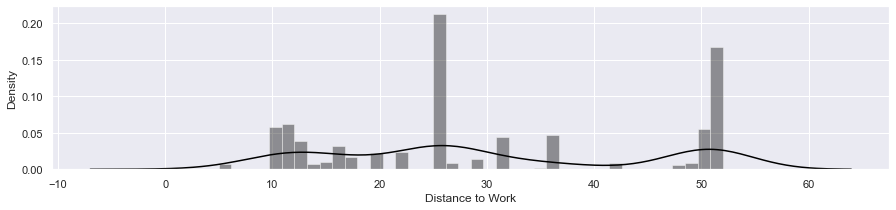

In [8]:
ax = plt.subplots(1,1,figsize=(15,3))
ax = sns.distplot(df['Distance to Work'] , color = 'black' , bins = 40)

<AxesSubplot:xlabel='Distance to Work'>

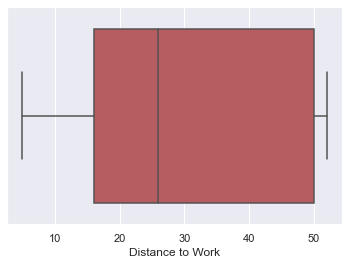

In [9]:
sns.boxplot(x = df['Distance to Work'] , color = 'r')

#### Age :

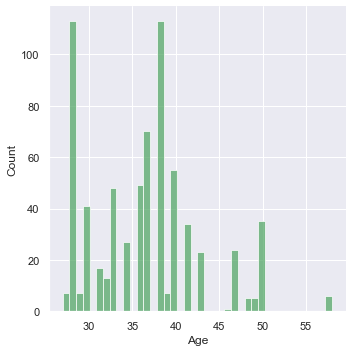

In [10]:
sns.displot(df['Age'] , color = 'g' , bins = 40)

- There are majority people in the Age Group of **25 - 30** and **35 - 40**.
- This shows the work union of young people and also experienced people as well.

#### Daily Work Load Average :
- This is measured in **Minutes/day**.

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


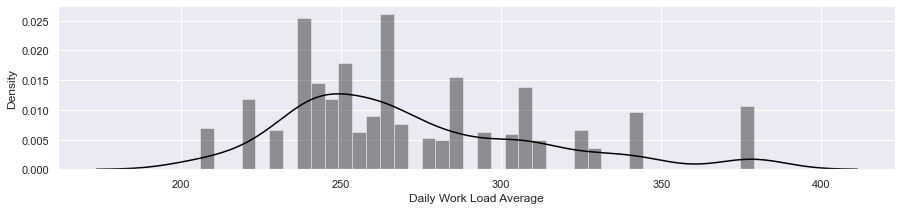

In [11]:
ax = plt.subplots(1,1,figsize=(15,3))
ax = sns.distplot(df['Daily Work Load Average'] , color = 'black' , bins = 40)

<AxesSubplot:xlabel='target', ylabel='Daily Work Load Average'>

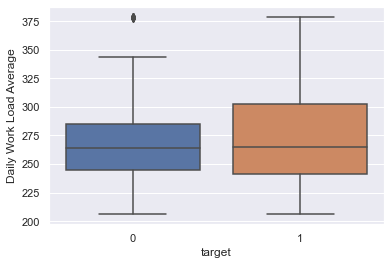

In [12]:
sns.boxplot(y = 'Daily Work Load Average' , x = 'target' , data = df )

- 25% of people having 3+ Hrs of Absenteeism are having comparatively low "Daily Work Load Average" when compared to Lessthan 3Hrs of Absenteeism.
- Majority people have "Daily Work Load Average" ranging from **170 - 230 min/day**

#### Absenteeism Time in Hours :
  - It refers to number of working hours a person is absent in a day.
  - At max it can be **18Hrs**.

In [13]:
print("No. of wrongly inserted entries in 'Absenteeism Time in Hours' are :", df[df['Absenteeism Time in Hours'] > 24].shape[0])

No. of wrongly inserted entries in 'Absenteeism Time in Hours' are : 26


C:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Absenteeism Time in Hours', ylabel='Density'>

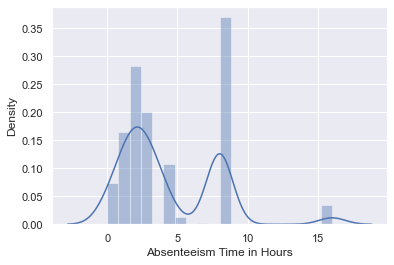

In [14]:
temp = df[df['Absenteeism Time in Hours'] < 24]
sns.distplot(temp['Absenteeism Time in Hours'] , bins = 20)

In [15]:
pd.DataFrame(df['Absenteeism Time in Hours'].value_counts().head(3))

,Absenteeism Time in Hours
8,195
2,149
3,106


**Key Points :**
   - Majority entries are for **8 , 2 and 3 Hrs**.
   - Also there are **26** wrong entries.

#### Education :

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Education', ylabel='count'>

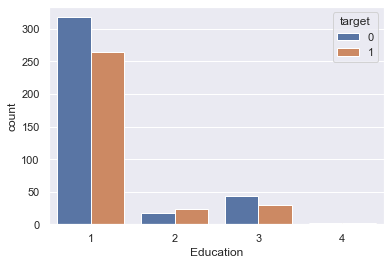

In [16]:
sns.countplot(df['Education'] , hue = 'target' , data = df)

**Key Points :**
   - Majority of people are only **"High School Graduated"**.
   - This people are also the one with **less than 3Hrs** of Absenteeism.

#### Pets :


C:\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Pets', ylabel='count'>

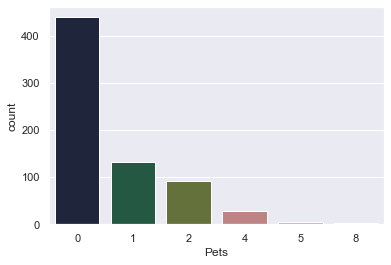

In [17]:
sns.countplot(df['Pets'] , palette = 'cubehelix')

**Key Points :**
  - Majority of people have **0** Pets.
  - Second max no. of Pets with people are **2**.